In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

### Some Regressions

In [2]:
data = pd.read_csv('auto-mpg.csv')
y = data[['mpg']]
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

In [3]:
formula = 'mpg ~ acceleration+weight+horsepower+displacement'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          9.63e-102
Time:                        14:26:05   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2511      2.456     18.424      0.000      40.422      50.080
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.717354783050516
Test R2:  0.6552610550724041
Train RMSE:  4.193630503201304
Test RMSE:  4.352872084142281


In [5]:
linreg.coef_

array([[-0.49350358,  0.00456885, -0.04121873, -0.00581742,  0.01866959]])

In [6]:
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['mpg'] = y_train
    
    formula = 'mpg~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    return model.summary()

In [7]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.717354783050516
Test R2:  0.6552610550724041
Train RMSE:  4.193630503201304
Test RMSE:  4.352872084142281


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     155.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           5.15e-82
Time:                        14:26:05   Log-Likelihood:                -892.83
No. Observations:                 313   AIC:                             1798.
Df Residuals:                     307   BIC:                             1820.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.8339      2.931     15.977      0.000      41.066      52.602
cylinders       -0.4935      0.466     -1.059      0.290      -1.410       0.423
displacement     0.0046      0.010      0.443      0.658      -0.016       0.025
horsepower      -0.0412      0.019     -2.190      0.029      -0.078      -0.004
weight          -0.0058      0.001     -6.100      0.000      -0.008      -0.004
acceleration     0.0187      0.142      0.132      0.895      -0.260       0.298
==============================================================================
Omnibus:                       37.720   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.053
Skew:                           0.808   Prob(JB):                     4.97e-12
Kurtosis:                       4.174   Cond. No.                     3.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
drop_high_p = X.drop(['cylinders', 'acceleration', 'displacement'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(drop_high_p, y, test_size=0.2)

In [9]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.6910703128028071
Test R2:  0.7706468496121195
Train RMSE:  4.370152016069147
Test RMSE:  3.6003948509871084


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     346.7
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           8.48e-80
Time:                        14:26:05   Log-Likelihood:                -905.74
No. Observations:                 313   AIC:                             1817.
Df Residuals:                     310   BIC:                             1829.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1103      0.937     49.193      0.000      44.266      47.955
horsepower    -0.0440      0.013     -3.304      0.001      -0.070      -0.018
weight        -0.0060      0.001    -10.080      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       26.502   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.931
Skew:                           0.674   Prob(JB):                     1.16e-07
Kurtosis:                       3.793   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Importing from Script

In [10]:
from functions import model as m

data = pd.read_csv('auto-mpg.csv')
y = data[['mpg']]
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
m(X_train, X_test, y_train, y_test)

Train R2:  0.7068357317618967
Test R2:  0.7087046184140524
Train RMSE:  4.258363974281484
Test RMSE:  4.048195297780073


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     148.0
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.37e-79
Time:                        14:26:05   Log-Likelihood:                -897.63
No. Observations:                 313   AIC:                             1807.
Df Residuals:                     307   BIC:                             1830.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.3287      2.991     15.490      0.000      40.443      52.214
cylinders       -0.4721      0.465     -1.016      0.310      -1.386       0.442
displacement     0.0023      0.010      0.217      0.828      -0.018       0.023
horsepower      -0.0405      0.019     -2.105      0.036      -0.078      -0.003
weight          -0.0056      0.001     -5.404      0.000      -0.008      -0.004
acceleration     0.0052      0.148      0.035      0.972      -0.286       0.296
==============================================================================
Omnibus:                       30.491   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.718
Skew:                           0.678   Prob(JB):                     8.73e-10
Kurtosis:                       4.166   Cond. No.                     3.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Assumptions

In [12]:
data = pd.read_csv('auto-mpg.csv')
y = data[['mpg']]
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

formula = 'mpg ~ acceleration+weight+horsepower+displacement'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          9.63e-102
Time:                        14:26:05   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2511      2.456     18.424      0.000      40.422      50.080
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normality and Homoscedasticity

In [13]:
y.values.flatten() - model.predict(X) 

0      -0.959192
1      -1.188442
2      -0.403250
3      -2.479956
4      -1.878269
         ...    
387     1.432973
388    13.415469
389     3.609309
390     1.205861
391     4.850850
Length: 392, dtype: float64

In [14]:
model.resid # actual - prediction

0      -0.959192
1      -1.188442
2      -0.403250
3      -2.479956
4      -1.878269
         ...    
387     1.432973
388    13.415469
389     3.609309
390     1.205861
391     4.850850
Length: 392, dtype: float64

In [16]:
import matplotlib.pyplot as plt

(array([  3.,  18.,  67., 109., 100.,  54.,  26.,   6.,   6.,   3.]),
 array([-11.3780864 ,  -8.61471192,  -5.85133745,  -3.08796297,
         -0.3245885 ,   2.43878598,   5.20216045,   7.96553493,
         10.7289094 ,  13.49228388,  16.25565835]),
 <BarContainer object of 10 artists>)

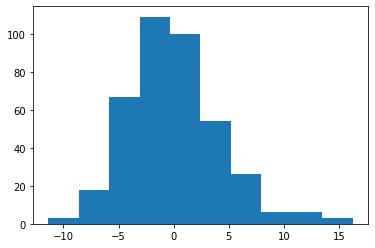

In [17]:
plt.hist(model.resid) # checking for normality of residuals

<ipython-input-18-87ceefcc01a4>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


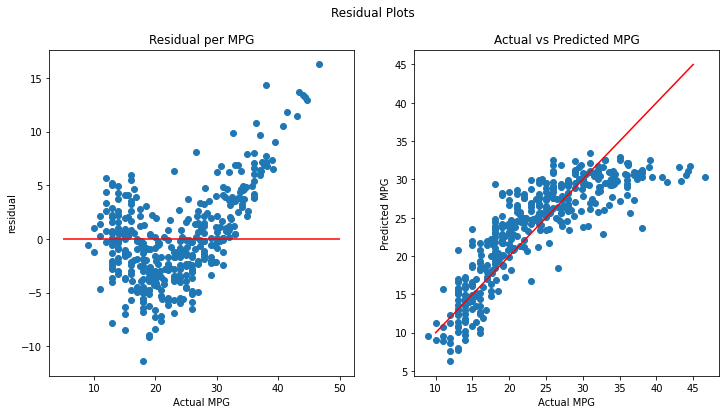

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y, model.resid)
axes[0].set(xlabel='Actual MPG', ylabel='residual', title='Residual per MPG')
axes[0].hlines(0, xmin=5, xmax=50, colors='red')

axes[1].scatter(y, model.predict(X))
axes[1].plot([10, 45], [10, 45], color='red', linestyle='-')
axes[1].set(xlabel='Actual MPG', ylabel='Predicted MPG', title='Actual vs Predicted MPG')
fig.show()

In [19]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.7149397778914311
Test R2:  0.6695935433550342
Train RMSE:  4.212375095902508
Test RMSE:  4.256536505326308


<ipython-input-20-8fada1bc017f>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


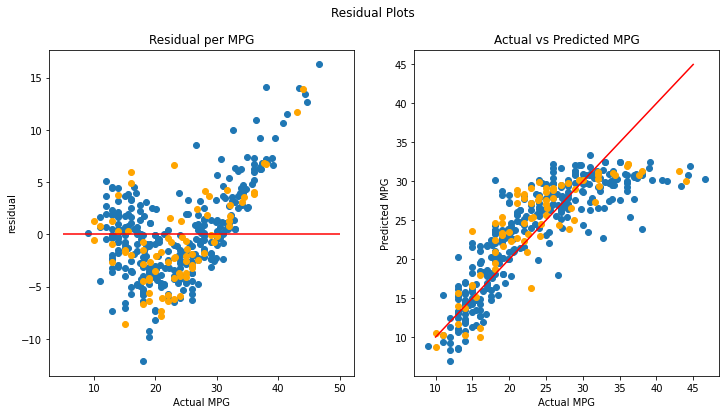

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train, y_train-y_hat_train)
axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
axes[0].set(xlabel='Actual MPG', ylabel='residual', title='Residual per MPG')
axes[0].hlines(0, xmin=5, xmax=50, colors='red')

axes[1].scatter(y_train, y_hat_train)
axes[1].scatter(y_test, y_hat_test, color='orange')
axes[1].plot([10, 45], [10, 45], color='red', linestyle='-')
axes[1].set(xlabel='Actual MPG', ylabel='Predicted MPG', title='Actual vs Predicted MPG')
fig.show()